In [1]:
from data_loader import *
from index_trend import *
from strategy import *
from trading import *

In [6]:
df = pd.read_csv('./Dataset/stock_minute_1.csv')
# df = df.drop(df.columns[0], axis = 1 )

In [7]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Ticker,TickerName
0,2022-10-11 13:50:00-04:00,1.8950,1.8950,1.8950,1.8950,1.8950,0.0,AACG,ATA Creativity Global American Depositary Shares
1,2022-10-12 10:23:00-04:00,1.8900,1.8900,1.8800,1.8800,1.8800,3092.0,AACG,ATA Creativity Global American Depositary Shares
2,2022-10-12 10:24:00-04:00,1.8800,1.8800,1.8800,1.8800,1.8800,0.0,AACG,ATA Creativity Global American Depositary Shares
3,2022-10-12 10:26:00-04:00,1.8850,1.8850,1.8850,1.8850,1.8850,3408.0,AACG,ATA Creativity Global American Depositary Shares
4,2022-10-12 10:41:00-04:00,1.8700,1.8739,1.8700,1.8739,1.8739,356.0,AACG,ATA Creativity Global American Depositary Shares
...,...,...,...,...,...,...,...,...,...
2782779,2022-10-18 10:37:00-04:00,9.3400,9.3400,9.3100,9.3100,9.3100,376.0,ZYXI,Zynex Inc. Common Stock
2782780,2022-10-18 10:39:00-04:00,9.3000,9.3100,9.2900,9.3100,9.3100,904.0,ZYXI,Zynex Inc. Common Stock
2782781,2022-10-18 10:52:00-04:00,9.3300,9.3300,9.3300,9.3300,9.3300,497.0,ZYXI,Zynex Inc. Common Stock
2782782,2022-10-18 10:57:00-04:00,9.3233,9.3245,9.3233,9.3245,9.3245,1140.0,ZYXI,Zynex Inc. Common Stock


In [4]:
df['Datetime'] = to_datetime(df['Datetime'])

In [5]:
goog_df = df.groupby('Ticker').get_group('GOOG')

In [7]:
bt = backtester(goog_df, 30000, 0, 0)

In [8]:
index_df = bt.get_strategy( a = 1/28, w=1)

In [20]:
index_df = bt.trading_signal(index_df, up = 60, down = 30)

In [21]:
index_df

,Datetime,Ticker,RSI,Adj Close,signal
1043725,2022-10-05 09:30:00,GOOG,NaN,100.864998,0
1043726,2022-10-05 09:31:00,GOOG,0.000000,100.830002,1
1043727,2022-10-05 09:32:00,GOOG,78.634236,100.954201,-1
1043728,2022-10-05 09:33:00,GOOG,91.393644,101.180000,-1
1043729,2022-10-05 09:34:00,GOOG,92.779845,101.250000,-1
...,...,...,...,...,...
3488168,2022-10-17 10:55:00,GOOG,47.052624,100.860001,0
3488169,2022-10-17 10:56:00,GOOG,45.575953,100.790001,0
3488170,2022-10-17 10:57:00,GOOG,46.569654,100.830002,0
3488171,2022-10-17 10:59:00,GOOG,49.666911,100.959999,0


In [22]:
back_test = bt.back_trading_result(index_df)

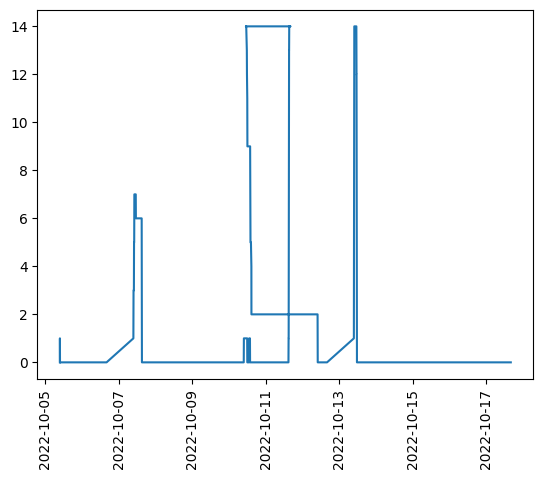

In [23]:
import matplotlib.pyplot as plt
plt.plot(back_test['Datetime'],back_test['stock'])
plt.xticks(rotation=90)
plt.show()

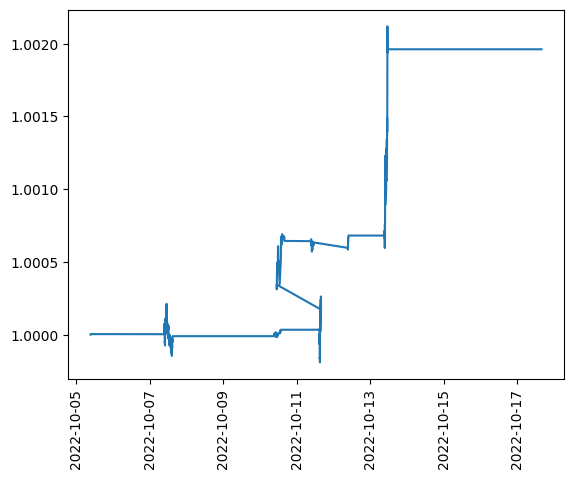

In [24]:
plt.plot(back_test['Datetime'],back_test['return'])
plt.xticks(rotation=90)
plt.show()

In [25]:
back_test

,Datetime,Ticker,signal,balance,stock,return
1043725,2022-10-05 09:30:00,GOOG,0,30145.748291,0,1.000000
1043726,2022-10-05 09:31:00,GOOG,1,30044.918289,1,1.000000
1043727,2022-10-05 09:32:00,GOOG,-1,30145.872490,0,1.000004
1043728,2022-10-05 09:33:00,GOOG,-1,30145.872490,0,1.000004
1043729,2022-10-05 09:34:00,GOOG,-1,30145.872490,0,1.000004
...,...,...,...,...,...,...
3488168,2022-10-17 10:55:00,GOOG,0,30204.855278,0,1.001961
3488169,2022-10-17 10:56:00,GOOG,0,30204.855278,0,1.001961
3488170,2022-10-17 10:57:00,GOOG,0,30204.855278,0,1.001961
3488171,2022-10-17 10:59:00,GOOG,0,30204.855278,0,1.001961


In [42]:
import time 

In [77]:
l = []
while True:
    lamb = yf.download(tickers = 'GOOG', start = dt.datetime.strftime(dt.datetime.today(), '%Y-%m-%d'), interval = '1m', progress=False, show_errors=False).iloc[-1]
    l.append(lamb)
    if lamb['Volume'] != 0:
        break

_ = pd.DataFrame(l)

In [78]:
_.reset_index(inplace=True)

In [79]:
_['index'].unique()

<DatetimeArray>
['2022-10-19 11:38:13-04:00', '2022-10-19 11:39:08-04:00',
 '2022-10-19 11:39:09-04:00', '2022-10-19 11:39:11-04:00',
 '2022-10-19 11:39:13-04:00', '2022-10-19 11:39:15-04:00',
 '2022-10-19 11:39:17-04:00', '2022-10-19 11:39:18-04:00',
 '2022-10-19 11:39:22-04:00', '2022-10-19 11:39:23-04:00',
 '2022-10-19 11:39:26-04:00', '2022-10-19 11:39:27-04:00',
 '2022-10-19 11:39:29-04:00', '2022-10-19 11:39:28-04:00',
 '2022-10-19 11:39:41-04:00', '2022-10-19 11:39:44-04:00',
 '2022-10-19 11:39:46-04:00', '2022-10-19 11:39:47-04:00',
 '2022-10-19 11:39:48-04:00', '2022-10-19 11:39:50-04:00',
 '2022-10-19 11:40:33-04:00', '2022-10-19 11:40:36-04:00',
 '2022-10-19 11:40:37-04:00', '2022-10-19 11:40:38-04:00',
 '2022-10-19 11:40:41-04:00', '2022-10-19 11:40:42-04:00',
 '2022-10-19 11:40:46-04:00', '2022-10-19 11:40:50-04:00',
 '2022-10-19 11:40:53-04:00', '2022-10-19 11:40:55-04:00',
 '2022-10-19 11:40:59-04:00', '2022-10-19 11:40:00-04:00']
Length: 32, dtype: datetime64[ns, Americ

In [80]:
_

,index,Open,High,Low,Close,Adj Close,Volume
0,2022-10-19 11:38:13-04:00,100.779999,100.779999,100.779999,100.779999,100.779999,0.0
1,2022-10-19 11:38:13-04:00,100.779999,100.779999,100.779999,100.779999,100.779999,0.0
2,2022-10-19 11:38:13-04:00,100.779999,100.779999,100.779999,100.779999,100.779999,0.0
3,2022-10-19 11:38:13-04:00,100.779999,100.779999,100.779999,100.779999,100.779999,0.0
4,2022-10-19 11:38:13-04:00,100.779999,100.779999,100.779999,100.779999,100.779999,0.0
...,...,...,...,...,...,...,...
466,2022-10-19 11:40:59-04:00,100.949997,100.949997,100.949997,100.949997,100.949997,0.0
467,2022-10-19 11:40:59-04:00,100.949997,100.949997,100.949997,100.949997,100.949997,0.0
468,2022-10-19 11:40:59-04:00,100.949997,100.949997,100.949997,100.949997,100.949997,0.0
469,2022-10-19 11:40:59-04:00,100.949997,100.949997,100.949997,100.949997,100.949997,0.0
